## Perform kernel trick-based SVM on the simulation data you generate

sklearnのサンプルジェネレーターで仮想データを作成してSVMで分類する

In [29]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=200, noise=.05)

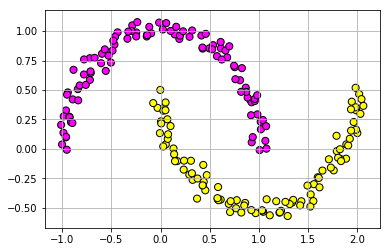

In [30]:
plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k',s=50,cmap='spring')
plt.grid()
plt.show()

In [31]:
from sklearn.svm import SVC

In [32]:
clf = SVC(kernel='rbf')
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
def plot_svc_decision_function(clf, ax=None): 
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca() # 現在の軸データを格納している
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30) # x軸の範囲を30個の等差数列に分割している
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30) # y軸の範囲を30個の等差数列に分割している
    Y, X = np.meshgrid(y, x) # 30*30の格子配列を作って、それぞれのx座標、y座標を格納
    P = np.zeros_like(X) # Xと同じ次元(30*30)で要素が0の行列を作る
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function(np.array([[xi, yj]])) # (x,y)と超平面との距離を30*30の格子配列に格納していく
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--']) # 距離が-1,0,1の等高線を引く
# この関数は散布図の後に置かないと、軸データを参照できないためうまく線が引けなくなってしまう

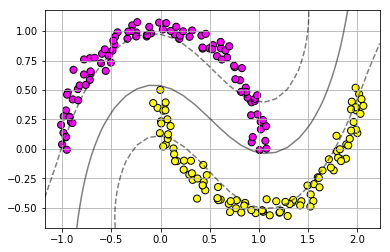

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring', edgecolors="k")
plot_svc_decision_function(clf)
plt.grid()
plt.show()

トレーニングデータの分類に近い形で識別境界が引かれている。

二次元正規分布から仮想データを作成する。

In [35]:
mu_1 = [1,1]
cov_1 = [[1,0],[0,2]]
X_1 = np.random.multivariate_normal(mu_1,cov_1,200)
y_1 = np.array([0]).repeat(200)

mu_2 = [3,5]
cov_2 = [[2,1.5],[1.5, 4]]
X_2 = np.random.multivariate_normal(mu_2,cov_2,200)
y_2 = np.array([1]).repeat(200)

X_ = np.r_[X_1,X_2]
y_ = np.r_[y_1,y_2]

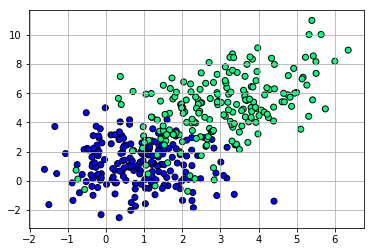

In [36]:
plt.scatter(X_[:,0],X_[:,1],c=y_,edgecolor="k",cmap="winter")
plt.grid()
plt.show()

- 線形SVMによる分類

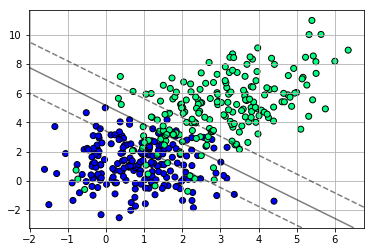

In [37]:
clf_l = SVC(kernel="linear")
clf_l.fit(X_,y_)

plt.scatter(X_[:,0],X_[:,1],c=y_,edgecolor="black", cmap="winter")
plot_svc_decision_function(clf_l)
plt.grid()
plt.show()

2クラスの重なる部分で識別境界が引かれるが、マージンは狭い。

- 多項式カーネルによる分類

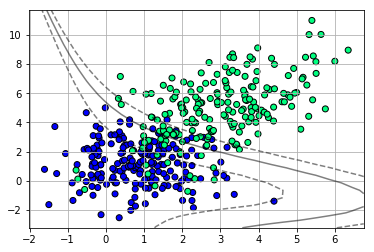

In [39]:
clf_p = SVC(kernel="poly")
clf_p.fit(X_,y_)

plt.scatter(X_[:,0],X_[:,1],c=y_,edgecolor="black", cmap="winter")
plot_svc_decision_function(clf_p)
plt.grid()
plt.show()

- RBFカーネルによる分類

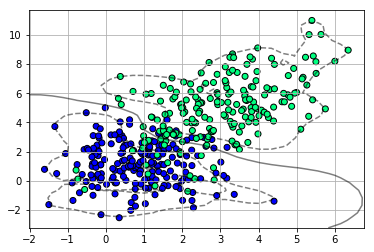

In [38]:
clf_r = SVC(kernel="rbf")
clf_r.fit(X_,y_)

plt.scatter(X_[:,0],X_[:,1],c=y_,edgecolor="black", cmap="winter")
plot_svc_decision_function(clf_r)
plt.grid()
plt.show()

$-1,1$のマージンは各クラスデータの外周を囲うように引かれる

### カーネル関数とカーネルトリック
線形分離が困難な場合の手法　＝　非線形写像をして線形識別する
  
$\mathbf{x}=\{x_1,x_2,...,x_N\}\in \mathbb{R}^N$の$\mathbf{\phi}=\{\phi_1(\mathbf{x}),\phi_2(\mathbf{x}),...,\phi_M(\mathbf{x})\}$への非線形写像を考える。カーネル関数$K$は、$\mathbf{x},\ \mathbf{y}\in \mathbb{R}^N$の非線形空間でのベクトルの内積$\phi(\mathbf{x})^T \phi(\mathbf{y})$を表す。つまり、
$$
K(\mathbf{x},\mathbf{y})=\phi(\mathbf{x})^T \phi(\mathbf{y})
$$
となる。  
例えば、$\mathbf{x}=(x_1,x_2),\mathbf{y}=(y_1,y_2)$の多項式カーネル$K_p(\mathbf{x},\mathbf{y})=(\alpha+\mathbf{x}^T \mathbf{y})^p$を考える。$\alpha=1,\ p=2$とすると、
$$
\begin{align}
K(\mathbf{x},\mathbf{y})&=(1+\mathbf{x}^T \mathbf{y})^2\\
&=(1+(x_1,x_2)^T(y_1,y_2))^2\\
&=(1+x_1y_1+x_2y_2)^2\\
&=1+x_1^2y_1^2+x_2^2y_2^2+2x_1x_2y_1y_2+2x_1x_2+2y_1y_2
\end{align}
$$
となるが、これは、$\phi(\mathbf{x})=(1,x_1^2,x_2^2,\sqrt{2}x_1x_2,\sqrt{2}x_1,\sqrt{2}x_2),\phi(\mathbf{y})=(1,y_1^2,y_2^2,\sqrt{2}y_1y_2,\sqrt{2}y_1,\sqrt{2}y_2)$の内積に等しく、もともと2次元空間のデータを6次元の非線形空間に写像した後に内積をとる計算が、2次元空間の関数で可能であることに他ならない。さらに、この写像関数$\phi(\mathbf{x}),\phi(\mathbf{y})$を求めることなく関数の内積を計算する事が可能である。これがカーネルトリックである。

#### カーネル関数による非線形変換がどのようなものかを可視化する  
  
カーネル関数は非線形空間での内積を表す事は先に述べたので、先に$\mathbb{R}^2$での内積を可視化しておく。  
$\mathbf{u}=(0.5,0.5)$と$\mathbf{v}=[-1,1]$との内積を可視化する。

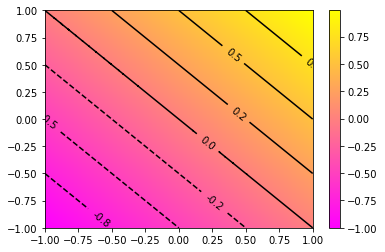

In [13]:
u0 = np.array([0.5,0.5])
x_ = np.linspace(-1,1,200)
y_ = np.linspace(-1,1,200)
X_, Y_ = np.meshgrid(x_, y_)
P0 = np.zeros_like(X_)
for i, xi in enumerate(x_):
    for j, yj in enumerate(y_):
        P0[i,j] = np.dot(u0.T,np.array([xi,yj]))

plt.pcolormesh(X_, Y_, P0, cmap="spring")
plt.colorbar()
cont = plt.contour(X_, Y_, P0,colors=['k'])
cont.clabel(fmt='%1.1f')
plt.show()

$(1,1)$から$(-1,-1)$に向かい、$\mathbf{u}^T\mathbf{v}$は$1$から$-1$へと等間隔となる等高線が作成された。

次に多項式カーネルとRBFカーネルを可視化する。

In [11]:
# 多項式カーネル
def poly_k(x,y,alpha,p):
    K = (alpha+np.dot(x.T,y))**p
    return(K)

# RBFカーネル
def gauss_k(x,y,sigma):
    K = np.exp(-np.linalg.norm(x-y)/(2*(sigma**2)))
    return(K)

$\mathbf{u}=(0.5,0.5)$と$\mathbf{v}=[-1,1]$の多項式カーネル$K(\mathbf{u},\mathbf{v})=(0.01+\mathbf{u}^T\mathbf{v})^2$を可視化する。

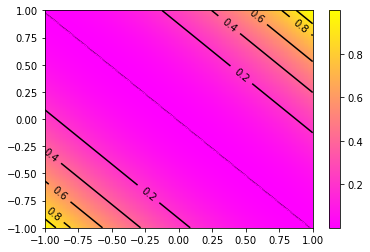

In [20]:
u1 = np.array([0.5,0.5])
x_ = np.linspace(-1,1,200)
y_ = np.linspace(-1,1,200)
X_, Y_ = np.meshgrid(x_, y_)
P1 = np.zeros_like(X_)
for i, xi in enumerate(x_):
    for j, yj in enumerate(y_):
        P1[i,j] = poly_k(u1,np.array([xi,yj]),0.01,2)

plt.pcolormesh(X_, Y_, P1, cmap="spring")
plt.colorbar()
cont = plt.contour(X_, Y_, P1,colors=['k'],levels=[0.0000001,0.2,0.4,0.6,0.8,0.9])
cont.clabel(fmt='%1.1f')
plt.show()

上記の多項式カーネルでは、$K(\mathbf{u},\mathbf{v})$は$(1,1),(-1,-1)$では$1$になり、$v_1=-v_2$では$0$になる。また、等高線の間隔は$0$に近ずくにつれ広くなる。

$\mathbf{u}=(0.5,0.5)$と$\mathbf{v}=[-1,1]$のRBFカーネル$K(\mathbf{u},\mathbf{v})=\exp\left(-\frac{||\mathbf{u}-\mathbf{v}||^2}{2\sigma^2}\right)(\sigma=0.5)$を可視化する。

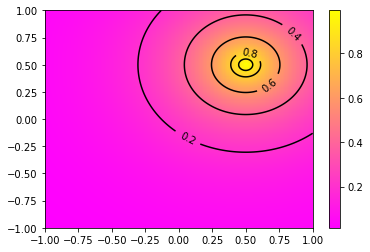

In [25]:
u2 = np.array([0.5,0.5])
x_ = np.linspace(-1,1,200)
y_ = np.linspace(-1,1,200)
X_, Y_ = np.meshgrid(x_, y_)
P2 = np.zeros_like(X_)
for i, xi in enumerate(x_):
    for j, yj in enumerate(y_):
        P2[i,j] = gauss_k(u2,np.array([xi,yj]),0.5)

plt.pcolormesh(X_, Y_, P2, cmap="spring")
plt.colorbar()
cont = plt.contour(X_, Y_, P2,colors=['k'],levels=[0.01,0.2,0.4,0.6,0.8,0.9])
cont.clabel(fmt='%1.1f')
plt.show()

上記のRBFカーネルでは、$(0.5,0.5)$で$K(\mathbf{u},\mathbf{v})$が$1$となり、そこから等高線は楕円形になり幅が広くなりながら広がっていく。これは、カーネル関数の式が正規分布の確率密度関数と似ていることから、$K(\mathbf{u},\mathbf{v})$は$\mathbf{u}=\mathbf{v}$で最大となり、$\mathbf{u}$との距離が離れると$\sigma$の値にしたがって小さくなっていくことになる。$\sigma$が大きくなれば等高線の幅は広くなり、逆に小さくなれば狭くなる。言い換えると、$\mathbf{u}_i, \mathbf{u}_j\in \mathbb{R}^d$の場合、$\sigma$が大きくなれば$\mathbf{u}_i$と$\mathbf{u}_j$の非線形写像後の距離は長くなり、$\sigma$が小さくなれば距離がそれほど長くならない（線形分離しにくい）。